Цель: исходя из данных в датасете, построить модель, которая максимально точно будет предсказывать цены на жильё. 

Импортируем необходимые библиотеки для EDA.

In [371]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import mode 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score as r2
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Загружаем тренировочный сет данных. 

In [291]:
DATASET_PATH = './train.csv'

In [292]:
train_data = pd.read_csv(DATASET_PATH)

Бегло ознакомимся с данными из тренировочного датасета.

In [293]:
train_data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [294]:
train_data.shape

(10000, 20)

In [295]:
train_data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [296]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

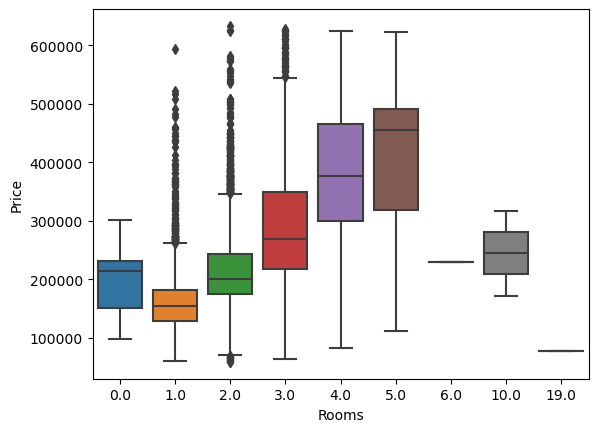

In [297]:
sns.boxplot(train_data['Rooms'], train_data['Price'])

Данные подлежат очистке от выбросов и запонению пустых значений.  

In [298]:
train_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,10000.0,NaN,NaN,NaN,8383.4077,4859.01902,0.0,4169.5,8394.5,12592.5,16798.0
DistrictId,10000.0,NaN,NaN,NaN,50.4008,43.587592,0.0,20.0,36.0,75.0,209.0
Rooms,10000.0,NaN,NaN,NaN,1.8905,0.839512,0.0,1.0,2.0,2.0,19.0
Square,10000.0,NaN,NaN,NaN,56.315775,21.058732,1.136859,41.774881,52.51331,65.900625,641.065193
LifeSquare,7887.0,NaN,NaN,NaN,37.199645,86.241209,0.370619,22.769832,32.78126,45.128803,7480.592129
KitchenSquare,10000.0,NaN,NaN,NaN,6.2733,28.560917,0.0,1.0,6.0,9.0,2014.0
Floor,10000.0,NaN,NaN,NaN,8.5267,5.241148,1.0,4.0,7.0,12.0,42.0
HouseFloor,10000.0,NaN,NaN,NaN,12.6094,6.775974,0.0,9.0,13.0,17.0,117.0
HouseYear,10000.0,NaN,NaN,NaN,3990.1663,200500.261427,1910.0,1974.0,1977.0,2001.0,20052011.0
Ecology_1,10000.0,NaN,NaN,NaN,0.118858,0.119025,0.0,0.017647,0.075424,0.195781,0.521867


Мы видим что в признаках 'Id', 'DistrictId', 'Rooms',  'KitchenSquare', 'HouseFloor', 'Ecology_1', 'Social_1', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', присутствуют значения равные 0. Мы должны разобраться для каких из этих признаков данное значение является выбросом. Так как значение 0 признака 'KitchenSquare' не всегда будет вбросом если речь идёт о квартирах-студиях например. Так же видим странные значения для признаков Rooms (минимальное значение: 0), Square (минимальное значение: 1.136859)   LifeSquare (минимальное значение равное 0.370619 и максимальное равное 7480.592129). Надо внимательно изучить значения данных признаков и поработать со странными значениями этих признаков. 

Допустим, что значение '0' для признаков 'Id'и 'DistrictId' не является вбросом, так как нумерация идентификаторов может начинаться с '0'. 

Минимальное значение признака 'Rooms' в датасете равно '0', это значение немного странно, так как в квартире или в доме должна быть хотя бы одна комната. Посмотрим сколько в датасете наблюдений со значением признака 'Rooms', равным '0'.  

In [299]:
train_data[train_data['Rooms'] == 0].shape

(8, 20)

Видим, что таких наблюдений всего 8. Посмотрим значения этих наблюдений. 

In [300]:
train_data[train_data['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


Заменим данное аномальное значение модой признанка. 

In [301]:
train_data.loc[train_data['Rooms'] == 0, 'Rooms'] = train_data['Rooms'].mode()

In [302]:
train_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,10000.0,NaN,NaN,NaN,8383.4077,4859.01902,0.0,4169.5,8394.5,12592.5,16798.0
DistrictId,10000.0,NaN,NaN,NaN,50.4008,43.587592,0.0,20.0,36.0,75.0,209.0
Rooms,9992.0,NaN,NaN,NaN,1.892014,0.838141,1.0,1.0,2.0,2.0,19.0
Square,10000.0,NaN,NaN,NaN,56.315775,21.058732,1.136859,41.774881,52.51331,65.900625,641.065193
LifeSquare,7887.0,NaN,NaN,NaN,37.199645,86.241209,0.370619,22.769832,32.78126,45.128803,7480.592129
KitchenSquare,10000.0,NaN,NaN,NaN,6.2733,28.560917,0.0,1.0,6.0,9.0,2014.0
Floor,10000.0,NaN,NaN,NaN,8.5267,5.241148,1.0,4.0,7.0,12.0,42.0
HouseFloor,10000.0,NaN,NaN,NaN,12.6094,6.775974,0.0,9.0,13.0,17.0,117.0
HouseYear,10000.0,NaN,NaN,NaN,3990.1663,200500.261427,1910.0,1974.0,1977.0,2001.0,20052011.0
Ecology_1,10000.0,NaN,NaN,NaN,0.118858,0.119025,0.0,0.017647,0.075424,0.195781,0.521867


Мы видим, что в датасете не осталось значения признака 'Rooms' равного '0'. Однако надо проверить данный признак на вбросы среди значений близких к максимуму. 

In [303]:
train_data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Мы видим что значения количества комнат больше 5 можно считать выбросами и заменить их модой. 

In [304]:
train_data.loc[train_data['Rooms'] > 5, 'Rooms'] = train_data['Rooms'].mode()

In [305]:
train_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,10000.0,NaN,NaN,NaN,8383.4077,4859.01902,0.0,4169.5,8394.5,12592.5,16798.0
DistrictId,10000.0,NaN,NaN,NaN,50.4008,43.587592,0.0,20.0,36.0,75.0,209.0
Rooms,9988.0,NaN,NaN,NaN,1.888266,0.811534,1.0,1.0,2.0,2.0,5.0
Square,10000.0,NaN,NaN,NaN,56.315775,21.058732,1.136859,41.774881,52.51331,65.900625,641.065193
LifeSquare,7887.0,NaN,NaN,NaN,37.199645,86.241209,0.370619,22.769832,32.78126,45.128803,7480.592129
KitchenSquare,10000.0,NaN,NaN,NaN,6.2733,28.560917,0.0,1.0,6.0,9.0,2014.0
Floor,10000.0,NaN,NaN,NaN,8.5267,5.241148,1.0,4.0,7.0,12.0,42.0
HouseFloor,10000.0,NaN,NaN,NaN,12.6094,6.775974,0.0,9.0,13.0,17.0,117.0
HouseYear,10000.0,NaN,NaN,NaN,3990.1663,200500.261427,1910.0,1974.0,1977.0,2001.0,20052011.0
Ecology_1,10000.0,NaN,NaN,NaN,0.118858,0.119025,0.0,0.017647,0.075424,0.195781,0.521867


Посмотрим на признак 'Square' минимальное значение данного признака равно 1.136859, что выглядит аномально. Исследуем значения данного признака на предмет выбросов. Возьмём пороговое значение 7 кв.м для данного признака. 

In [306]:
train_data[train_data['Square'] < 7].shape

(12, 20)

In [307]:
train_data[train_data['Square'] < 7]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4853,3224,27,NaN,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006


Видим, что таких значений всего 12. Будем счиать их выбросами. Заменим их значениями медианными значениями для для квартир с аналогичным количеством комнат. 

Найдём медианные значения для квартир с различным количеством комнат. 

In [308]:
flats_1_room = train_data[train_data['Rooms'] == 1]
sq_1_room = flats_1_room['Square'].median()
sq_1_room


40.40658991236909

In [309]:
flats_2_rooms = train_data[train_data['Rooms'] == 2]
sq_2_rooms = flats_2_rooms['Square'].median()
sq_2_rooms


55.841812139030544

In [310]:
flats_3_rooms = train_data[train_data['Rooms'] == 3]
sq_3_rooms = flats_3_rooms['Square'].median()
sq_3_rooms

77.41364294803941

In [311]:
flats_4_rooms = train_data[train_data['Rooms'] == 4]
sq_4_rooms = flats_4_rooms['Square'].median()
sq_4_rooms

98.66805357992513

In [312]:
flats_5_rooms = train_data[train_data['Rooms'] == 5]
sq_5_rooms = flats_5_rooms['Square'].median()
sq_5_rooms

116.08486083443313

В тренировочном датасете можно видеть выбросы для 1, 2 и 3-х комнатных квартир. Заменим аномальные значения медианными. 

In [313]:
train_data.loc[(train_data['Rooms'] ==1) & (train_data['Square'] < 7), 'Square'] = sq_1_room

In [314]:
train_data.loc[(train_data['Rooms'] ==2) & (train_data['Square'] < 7), 'Square'] = sq_2_rooms

In [315]:
train_data.loc[(train_data['Rooms'] ==3) & (train_data['Square'] < 7), 'Square'] = sq_3_rooms

In [316]:
train_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,10000.0,NaN,NaN,NaN,8383.4077,4859.01902,0.0,4169.5,8394.5,12592.5,16798.0
DistrictId,10000.0,NaN,NaN,NaN,50.4008,43.587592,0.0,20.0,36.0,75.0,209.0
Rooms,9988.0,NaN,NaN,NaN,1.888266,0.811534,1.0,1.0,2.0,2.0,5.0
Square,10000.0,NaN,NaN,NaN,56.364964,20.99347,2.377248,41.782323,52.535436,65.912854,641.065193
LifeSquare,7887.0,NaN,NaN,NaN,37.199645,86.241209,0.370619,22.769832,32.78126,45.128803,7480.592129
KitchenSquare,10000.0,NaN,NaN,NaN,6.2733,28.560917,0.0,1.0,6.0,9.0,2014.0
Floor,10000.0,NaN,NaN,NaN,8.5267,5.241148,1.0,4.0,7.0,12.0,42.0
HouseFloor,10000.0,NaN,NaN,NaN,12.6094,6.775974,0.0,9.0,13.0,17.0,117.0
HouseYear,10000.0,NaN,NaN,NaN,3990.1663,200500.261427,1910.0,1974.0,1977.0,2001.0,20052011.0
Ecology_1,10000.0,NaN,NaN,NaN,0.118858,0.119025,0.0,0.017647,0.075424,0.195781,0.521867


Найдем выбросы  в значениях которые находятся ближе к максимуму. 

<AxesSubplot:xlabel='Square', ylabel='Density'>

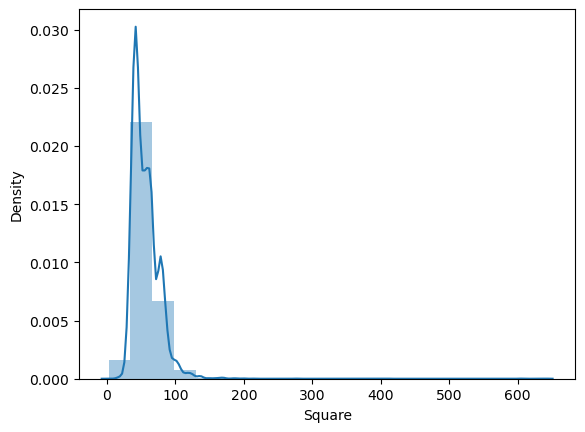

In [317]:
sns.distplot(train_data['Square'], bins=20)

Посмотрим сколько значений площади квартир, которые больше 200 кв.м.

In [318]:
train_data[train_data['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,NaN,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016


Их всего 6. Заменим данные значения на медиану. 

In [319]:
train_data.loc[train_data['Square'] > 200, 'Square'] = train_data['Square'].median()

<AxesSubplot:xlabel='Square', ylabel='Density'>

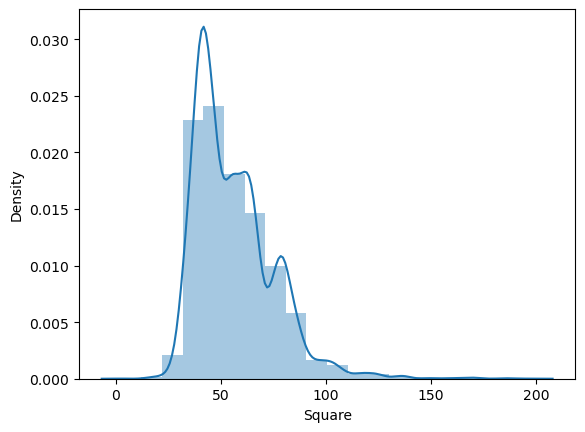

In [320]:
sns.distplot(train_data['Square'], bins=20)

In [321]:
train_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,10000.0,NaN,NaN,NaN,8383.4077,4859.01902,0.0,4169.5,8394.5,12592.5,16798.0
DistrictId,10000.0,NaN,NaN,NaN,50.4008,43.587592,0.0,20.0,36.0,75.0,209.0
Rooms,9988.0,NaN,NaN,NaN,1.888266,0.811534,1.0,1.0,2.0,2.0,5.0
Square,10000.0,NaN,NaN,NaN,56.162074,18.831675,2.377248,41.782323,52.534859,65.889256,198.930182
LifeSquare,7887.0,NaN,NaN,NaN,37.199645,86.241209,0.370619,22.769832,32.78126,45.128803,7480.592129
KitchenSquare,10000.0,NaN,NaN,NaN,6.2733,28.560917,0.0,1.0,6.0,9.0,2014.0
Floor,10000.0,NaN,NaN,NaN,8.5267,5.241148,1.0,4.0,7.0,12.0,42.0
HouseFloor,10000.0,NaN,NaN,NaN,12.6094,6.775974,0.0,9.0,13.0,17.0,117.0
HouseYear,10000.0,NaN,NaN,NaN,3990.1663,200500.261427,1910.0,1974.0,1977.0,2001.0,20052011.0
Ecology_1,10000.0,NaN,NaN,NaN,0.118858,0.119025,0.0,0.017647,0.075424,0.195781,0.521867


При анализе признаков также видно есть некоторые наблюдения со значениями LifeSquare больше Square, 
что в принипе быть не должно. Будем предполагать, что Square - это общая площадь квартиры, а LifeSquare - это жилая. 

In [322]:
train_data[train_data['Square'] < train_data['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2.0,59.015896,59.439082,12.0,5,5.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047
9902,14001,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161


Чтобы это исправить приравняем общую площадь к жилой в тех наблюдениях в которых есть данное несоответствие. 

In [323]:
train_data.loc[train_data['Square'] < train_data['LifeSquare'], 'LifeSquare'] = train_data['Square']

В признаке KitchenSquare встречаются нулевые значения. Давайте на них посмотрим. 

In [324]:
train_data[train_data['KitchenSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
39,9371,23,2.0,60.503248,NaN,0.0,16,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,8438,1,2.0,66.736039,NaN,0.0,16,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,199237.847364
9953,5365,1,2.0,61.049491,NaN,0.0,11,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,190085.168584
9960,9307,1,2.0,57.376642,NaN,0.0,8,25.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,104450.496477
9965,6612,27,2.0,59.460685,NaN,0.0,15,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,135784.320930


Наблюдений с такими значениями 697. Заменим их медианой. 

In [325]:
train_data.loc[train_data['KitchenSquare'] == 0, 'KitchenSquare']  = train_data['KitchenSquare'].median()

In [326]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,9988.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.888266,56.162074,35.888824,6.691500,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.811534,18.831675,17.300923,28.509876,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.000000,2.377248,0.370619,1.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.782323,22.769832,4.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.534859,32.772431,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.889256,45.042275,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,5.000000,198.930182,174.649522,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [327]:
train_data[train_data['KitchenSquare']>20].count()

Id               48
DistrictId       48
Rooms            48
Square           48
LifeSquare       47
KitchenSquare    48
Floor            48
HouseFloor       48
HouseYear        48
Ecology_1        48
Ecology_2        48
Ecology_3        48
Social_1         48
Social_2         48
Social_3         48
Healthcare_1     20
Helthcare_2      48
Shops_1          48
Shops_2          48
Price            48
dtype: int64

In [328]:
train_data.loc[train_data['KitchenSquare'] > 20, 'KitchenSquare'] = train_data['KitchenSquare'].median()

In [334]:
train_data[train_data['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,6.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
23,6641,54,3.0,118.907612,NaN,6.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,6.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
39,9371,23,2.0,60.503248,NaN,6.0,16,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
44,10521,38,3.0,104.211396,104.211396,6.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,12302,30,1.0,46.072913,46.072913,6.0,4,0.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,161403.094034
9769,9384,59,3.0,98.607328,NaN,6.0,14,0.0,1977,0.019509,B,B,37,7687,11,176.0,5,5,B,492700.257473
9878,11441,62,2.0,71.985335,71.985335,6.0,5,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,158841.624543
9908,3171,62,1.0,35.873961,NaN,6.0,25,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,134379.130962


In [336]:
train_data.loc[train_data['HouseFloor'] == 0, 'HouseFloor'] = train_data['Floor']

Поработаем с пропусками в значениях признаков.

In [338]:
train_data.isna().sum()

Id                  0
DistrictId          0
Rooms              12
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [340]:
train_data[train_data['LifeSquare'].isna()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,6.0,14,14.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
21,11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3.0,118.907612,NaN,6.0,2,2.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
25,5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,244145.827069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,16159,27,1.0,38.968338,NaN,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
9986,2996,1,2.0,64.994245,NaN,1.0,9,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,200332.511658
9987,15623,23,2.0,55.620092,NaN,6.0,2,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,115797.553006
9994,4158,23,2.0,64.864198,NaN,1.0,17,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,171323.515653


In [344]:
train_data.loc[train_data['LifeSquare'].isna(), 'LifeSquare'] = (train_data['Square'] - train_data['KitchenSquare'])

In [351]:
train_data.loc[train_data['Rooms'].isna(), 'Rooms'] = train_data['Rooms'].median()

In [352]:
train_data.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Healthcare_1 оставим без изменений, так как его пропуски не должны сильно повлиять на качество модели.  

Разбиваем датасет на тестовый и валидационный.

In [354]:
train, valid = train_test_split(train_data, test_size=0.3, random_state=42)

In [355]:
init_df = train.copy()

In [358]:
avg_price = init_df.groupby(['DistrictId'])['Price'].mean().reset_index() #определяем ср. цену по району

In [359]:
avg_price.columns = ['DistrictId','mean_price_district']
avg_price.head()

,DistrictId,mean_price_district
0,0,195959.441913
1,1,186992.977582
2,2,248441.974415
3,3,168835.746518
4,4,318869.698827


In [361]:
# Создадим функцию подготовки данных на основе ранее проделанного исследования данных
def data_preporation(train_data, init_df = init_df, avg_price = avg_price):
    
    train_data.loc[train_data['Rooms'] == 0, 'Rooms'] = train_data['Rooms'].mode()
    train_data.loc[train_data['Rooms'] > 5, 'Rooms'] = train_data['Rooms'].mode()
    
    train_data = pd.merge(train_data, avg_price, how = 'left', on = ['DistrictId'])
    train_data['mean_price_district'].fillna(value=train.Price.mean(), inplace = True)
    
    flats_1_room = train_data[train_data['Rooms'] == 1]
    sq_1_room = flats_1_room['Square'].median()
    
    flats_2_rooms = train_data[train_data['Rooms'] == 2]
    sq_2_rooms = flats_2_rooms['Square'].median()
    
    flats_3_rooms = train_data[train_data['Rooms'] == 3]
    sq_3_rooms = flats_3_rooms['Square'].median()
    
    flats_4_rooms = train_data[train_data['Rooms'] == 4]
    sq_4_rooms = flats_4_rooms['Square'].median()
    
    flats_5_rooms = train_data[train_data['Rooms'] == 5]
    sq_5_rooms = flats_5_rooms['Square'].median()
    
    train_data.loc[(train_data['Rooms'] ==1) & (train_data['Square'] < 7), 'Square'] = sq_1_room
    train_data.loc[(train_data['Rooms'] ==2) & (train_data['Square'] < 7), 'Square'] = sq_2_rooms
    train_data.loc[(train_data['Rooms'] ==3) & (train_data['Square'] < 7), 'Square'] = sq_3_rooms
    train_data.loc[(train_data['Rooms'] ==4) & (train_data['Square'] < 7), 'Square'] = sq_4_rooms
    train_data.loc[(train_data['Rooms'] ==5) & (train_data['Square'] < 7), 'Square'] = sq_5_rooms
    
    train_data.loc[train_data['Square'] > 200, 'Square'] = train_data['Square'].median()
    
    train_data.loc[train_data['Square'] < train_data['LifeSquare'], 'LifeSquare'] = train_data['Square']
    train_data.loc[train_data['KitchenSquare'] == 0, 'KitchenSquare']  = train_data['KitchenSquare'].median()
    
    train_data.loc[train_data['KitchenSquare'] > 20, 'KitchenSquare'] = train_data['KitchenSquare'].median()
    train_data.loc[train_data['HouseFloor'] == 0, 'HouseFloor'] = train_data['Floor']
    
    train_data.loc[train_data['LifeSquare'].isna(), 'LifeSquare'] = (train_data['Square'] - train_data['KitchenSquare'])
    train_data.loc[train_data['Rooms'].isna(), 'Rooms'] = train_data['Rooms'].median()
    
    train_data['Shops_2'] = train_data['Shops_2'].map({'A':1, 'B':0})
    train_data['Ecology_2'] = train_data['Ecology_2'].map({'A':1, 'B':0})
    train_data['Ecology_3'] = train_data['Ecology_3'].map({'A':1, 'B':0})
    
    return train_data 
    
    

In [362]:
# Список признаков
features = ['mean_price_district','Rooms','Square','LifeSquare','KitchenSquare','HouseYear','HouseFloor','Floor', 
         'Shops_1','Shops_2', 'Ecology_1','Ecology_2','Ecology_3', 'Social_1', 'Social_2','Social_3','Helthcare_2']

In [363]:
# Готовим данные
train = data_preporation(train, train)
valid  = data_preporation(valid, train)

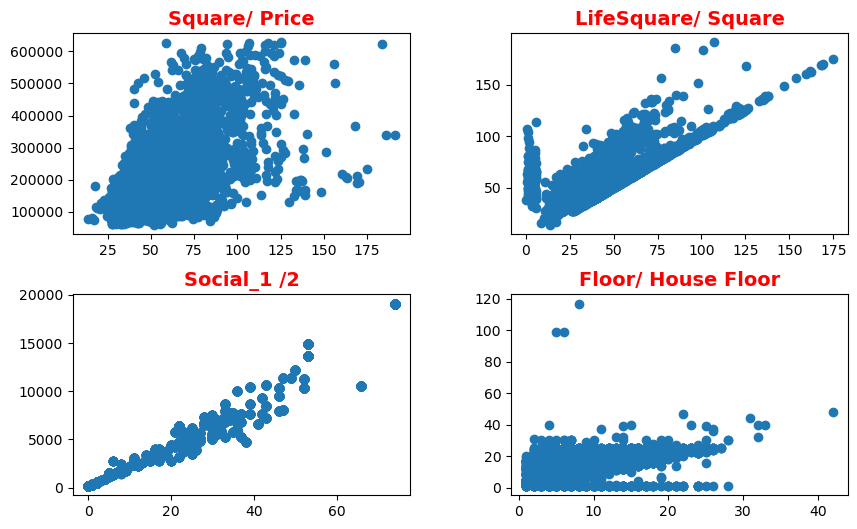

In [364]:
# Строим графики для данных из тренировочного датасета
fig, ax = plt. subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
title_font = {
    'fontsize': 14,
    'color': 'red',
    'fontweight': 'bold'
}
ax1.scatter(train['Square'], train['Price'])
ax1.set_title('Square/ Price', fontdict=title_font)
ax2.scatter(train['LifeSquare'], train['Square'])
ax2.set_title('LifeSquare/ Square', fontdict=title_font)
ax3.scatter(train['Social_1'], train['Social_2'])
ax3.set_title('Social_1 /2', fontdict=title_font)
ax4.scatter(train['Floor'], train['HouseFloor'])
ax4.set_title('Floor/ House Floor', fontdict=title_font)

fig.set_size_inches(10, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.3)



Создаём функцию тренировки модели.

In [365]:
def m_train(model, feats, train=train, valid=valid):
    model.fit(train.loc[:, feats], train['Price'])
    y_pred_valid = model.predict(valid.loc[:, feats])
    y_pred_train = model.predict(train.loc[:, feats])
    r2_valid = r2(valid['Price'], y_pred_valid)
    r2_train = r2(train['Price'], y_pred_train)
    print(f'Random Forest Regressor: \n\tr2_valid = {r2_valid:.4f} \n\tr2_train = {r2_train:.4f}\n')
    return y_pred_valid, y_pred_train

In [375]:
model = RFR(n_estimators= 500, min_samples_leaf=1, n_jobs=-1, random_state=42, max_features= 3)


In [376]:
m_train(model, features)

Random Forest Regressor: 
	r2_valid = 0.7307 
	r2_train = 0.9667



(array([183841.62109588, 315852.41728364, 211146.35805768, ...,
        276655.34854162, 109954.08397802, 263490.08828402]),
 array([ 93824.55503491, 210813.57042773, 180080.85061832, ...,
        245800.51797165, 190943.26593143, 416026.53544307]))

Проверим работу модели на тестовых данных.

In [385]:
test = pd.read_csv('test.csv')

In [386]:
test.shape

(5000, 19)

In [388]:
test = data_preporation(test)

In [380]:
test = data_preporation(test)

In [389]:
test['Price'] = model.predict(test.loc[:, features])

In [390]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,mean_price_district,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,0,11,2748,1,NaN,0,0,0,155768.248590,158009.190686
1,15856,74,2.0,69.263183,68.263183,1.0,6,1.0,1977,0.075779,...,0,6,1437,3,NaN,0,2,0,213690.664911,233041.760227
2,5480,190,1.0,13.597819,13.597819,12.0,2,5.0,1909,0.000000,...,0,30,7538,87,4702.0,5,5,0,516137.070651,259802.925491
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,0,23,4583,3,NaN,3,3,0,208264.447471,303533.366629
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,0,2,629,1,NaN,0,0,1,156986.698934,140188.001254


In [391]:
test.describe(include='all').transpose().apply(round)

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8413.0,4833.0,1.0,4222.0,8320.0,12598.0,16795.0
DistrictId,5000.0,51.0,44.0,0.0,21.0,37.0,77.0,212.0
Rooms,5000.0,2.0,1.0,1.0,1.0,2.0,2.0,5.0
Square,5000.0,56.0,19.0,13.0,42.0,53.0,66.0,190.0
LifeSquare,5000.0,40.0,20.0,0.0,26.0,37.0,50.0,169.0
KitchenSquare,5000.0,6.0,3.0,1.0,5.0,6.0,9.0,20.0
Floor,5000.0,9.0,5.0,1.0,4.0,7.0,12.0,78.0
HouseFloor,5000.0,13.0,7.0,1.0,9.0,13.0,17.0,99.0
HouseYear,5000.0,1984.0,19.0,1908.0,1973.0,1977.0,2000.0,2020.0
Ecology_1,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [392]:
test.loc[:, ['Id', 'Price']].to_csv('GAvsyannikov_predictions.csv', index = False)